In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Cho bộ dữ liệu về giá trị của 6 mã cổ phiếu lớn đại diện cho 6 nhóm ngành chính trên thị trường chứng khoán thế giới trong giai đoạn 2017 - 2021 dưới đây.

In [3]:
stock_df = pd.read_csv('Official_Data.csv')
stock_df

,Time,Adj Closed Price,Quarterly Return (%),Average Return (%),Stock,Market Sector,Month,month,Quarter,Size,Year
0,01/01/2017,51.142605,0.000000,-6.143619,HAL,Energy,Jan,1,1,Big Cap,2017
1,01/04/2017,41.619915,-18.619877,-6.143619,HAL,Energy,Apr,4,2,Big Cap,2017
2,01/07/2017,38.652908,-7.128816,-6.143619,HAL,Energy,Jul,7,3,Big Cap,2017
3,01/10/2017,39.106777,1.174217,-6.143619,HAL,Energy,Oct,10,4,Big Cap,2017
4,01/01/2017,796.789978,0.000000,6.416837,GOOG,Communication Services,Jan,1,1,Mega Cap,2017
...,...,...,...,...,...,...,...,...,...,...,...
115,01/10/2021,325.305176,-9.940607,1.885608,LMT,Industrials,Oct,10,4,Big Cap,2021
116,01/01/2021,350.750000,0.000000,10.312183,PANW,Information Technology,Jan,1,1,Big Cap,2021
117,01/04/2021,353.390015,0.752677,10.312183,PANW,Information Technology,Apr,4,2,Big Cap,2021
118,01/07/2021,399.049988,12.920561,10.312183,PANW,Information Technology,Jul,7,3,Big Cap,2021


### Trực quan hóa "Giá trị cổ phiếu theo quý của 6 nhóm ngành chính trên thị trường chứng khoán thế giới trong giai đoạn 2017 – 2021"

In [4]:
sns.set_style('dark')

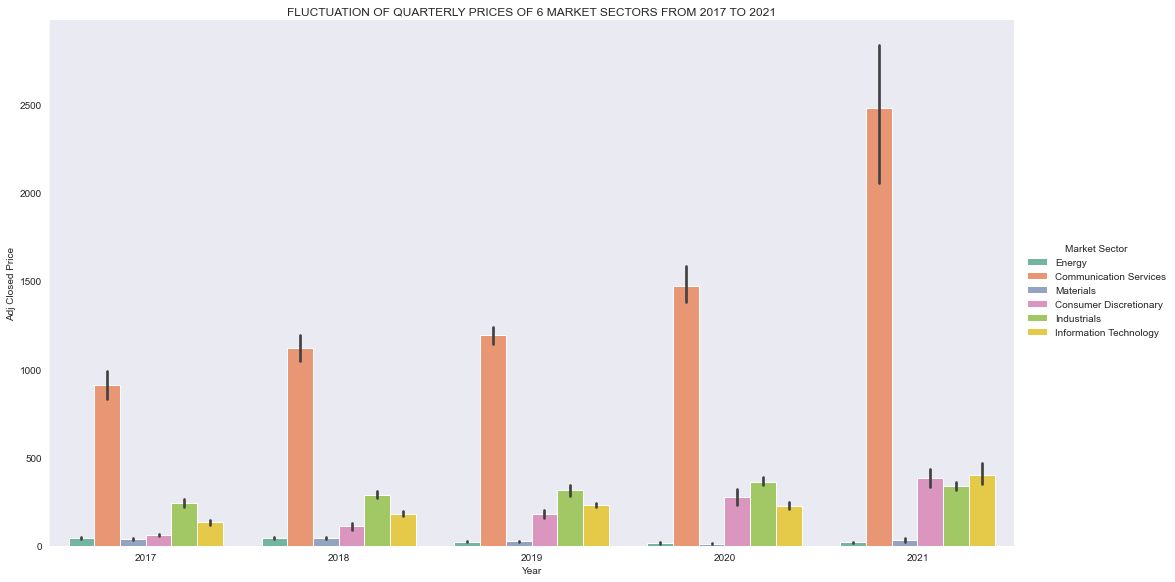

In [5]:
# Bar Plot (Sử dụng Catplot để tối ưu hóa tính năng của Barplot)

sns.catplot(data = stock_df, x = 'Year', y = 'Adj Closed Price',
            hue = 'Market Sector', palette = 'Set2', height = 8, 
            aspect = 1.8, kind = 'bar').set(title = 'FLUCTUATION OF QUARTERLY PRICES OF 6 MARKET SECTORS FROM 2017 TO 2021')

### Trực quan hóa "Lợi nhuận theo quý của 6 mã cổ phiếu đại diện 6 nhóm ngành chính trên thị trường chứng khoán thế  giới trong giai đoạn 2017 – 2021"

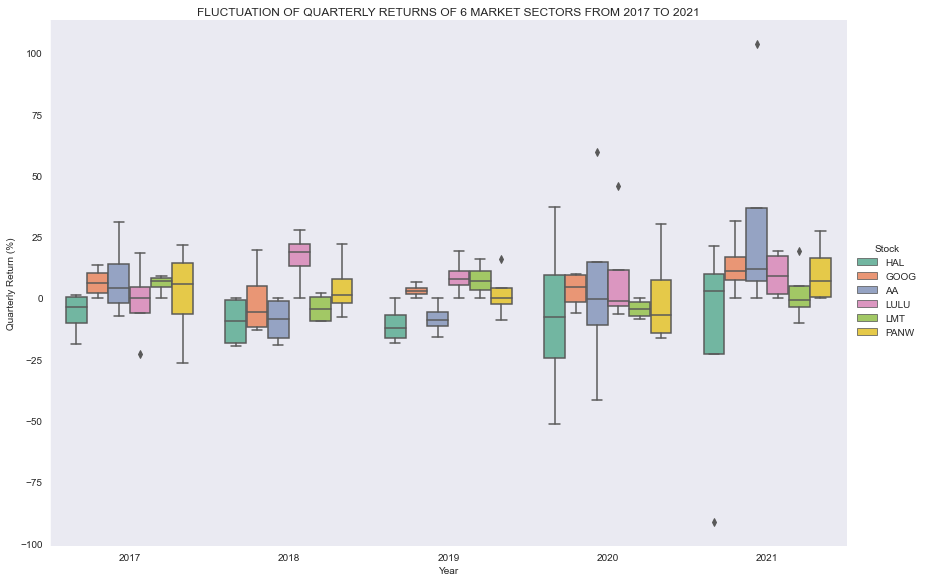

In [7]:
# Box Plot (Sử dụng Catplot để tối ưu hóa tính năng của Boxplot)

sns.catplot(data = stock_df, x = 'Year', y = 'Quarterly Return (%)', hue = 'Stock', 
            width = .8, palette = 'Set2', kind = 'box',
            height = 8, aspect = 1.5).set(title = "FLUCTUATION OF QUARTERLY RETURNS OF 6 MARKET SECTORS FROM 2017 TO 2021")

### Trực quan hóa "Lợi nhuận trung bình hàng năm của 6 nhóm ngành chính trên thị trường chứng khoán thế giới trong giai đoạn 2017 – 2021"

In [9]:
# Tạo bảng dữ liệu để trực quan hóa (Tiền xử lý dữ liệu)

sts = pd.pivot_table(data = stock_df, index = 'Market Sector', columns = 'Year', values = 'Average Return (%)')
sts

Year,2017,2018,2019,2020,2021
Market Sector,,,,,
Communication Services,6.416837,-1.233331,3.100414,3.325213,13.287563
Consumer Discretionary,-1.161705,16.279857,8.641057,9.277471,9.453884
Energy,-6.143619,-9.614432,-10.690693,-7.491594,9.553672
Industrials,5.794883,-4.031539,7.463497,-4.400564,1.885608
Information Technology,1.681697,4.313043,1.812286,0.090387,10.312183
Materials,7.929317,-9.050065,-8.342844,4.329191,31.895266


[Text(0.5, 0, '2017'),
 Text(1.5, 0, '2018'),
 Text(2.5, 0, '2019'),
 Text(3.5, 0, '2020'),
 Text(4.5, 0, '2021')]

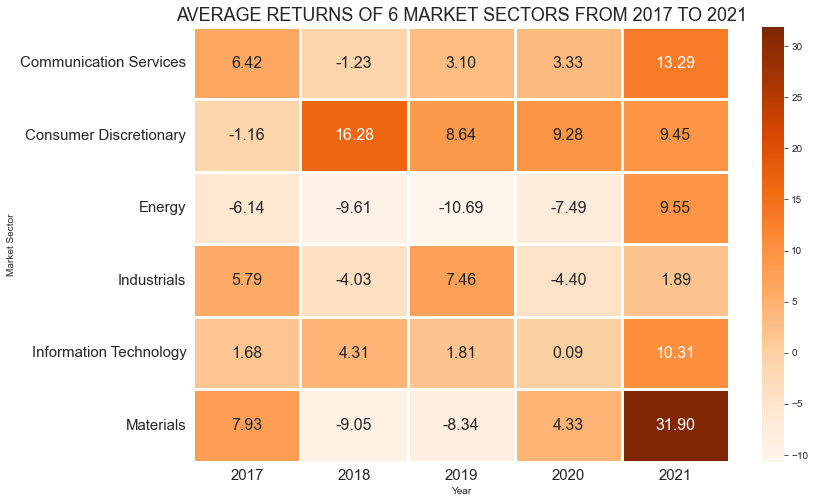

In [21]:
# Heat Map

# Thay đổi kích thước Heat Map
fig,ax = plt.subplots(figsize = (12,8)) 

# Vẽ Heat Map
sns.heatmap(data = sts, annot = True, fmt = '.2f',
            linewidths = 3, annot_kws = {'fontsize':16}, cmap = 'Oranges')

# Đặt tên (kèm chỉnh kích thước) tiêu đề của Heat Map
title = 'AVERAGE RETURNS OF 6 MARKET SECTORS FROM 2017 TO 2021'
ax.set_title(title, fontsize = 18)

# Thay đổi kích thước nhãn (labels) trên các trục x, y của Heat Map
yticks = sts.index
xticks = sts.columns
ax.set_yticklabels(yticks, rotation = 0, fontsize = 15)
ax.set_xticklabels(xticks, rotation = 0, fontsize = 15)

### Trực quan hóa "Giá trị cổ phiếu của 6 mã cổ phiếu đại diện 6 nhóm ngành chính trên thị trường chứng khoán thế giới năm 2020"

In [12]:
# Xóa cột (Tiền xử lý dữ liệu)

fields = ['Month', 'month', 'Size', 'Quarter', 'Market Sector']
stock_df_new = stock_df.drop(fields, axis=1)
stock_df_new.head()

,Time,Adj Closed Price,Quarterly Return (%),Average Return (%),Stock,Year
0,01/01/2017,51.142605,0.000000,-6.143619,HAL,2017
1,01/04/2017,41.619915,-18.619877,-6.143619,HAL,2017
2,01/07/2017,38.652908,-7.128816,-6.143619,HAL,2017
3,01/10/2017,39.106777,1.174217,-6.143619,HAL,2017
4,01/01/2017,796.789978,0.000000,6.416837,GOOG,2017


In [18]:
# Lọc dữ liệu theo tiêu chí bất kỳ (Tiền xử lý dữ liệu)

st111_df = stock_df_new[stock_df_new['Year'] == 2020]
st111_df

,Time,Adj Closed Price,Quarterly Return (%),Average Return (%),Stock,Year
72,01/01/2020,21.074806,0.000000,-7.491594,HAL,2020
73,01/04/2020,10.253232,-51.348392,-7.491594,HAL,2020
74,01/07/2020,14.045717,36.988191,-7.491594,HAL,2020
75,01/10/2020,11.853718,-15.606174,-7.491594,HAL,2020
76,01/01/2020,1434.229980,0.000000,3.325213,GOOG,2020
77,01/04/2020,1348.660034,-5.966264,3.325213,GOOG,2020
78,01/07/2020,1482.959961,9.958027,3.325213,GOOG,2020
79,01/10/2020,1621.010010,9.309088,3.325213,GOOG,2020
80,01/01/2020,13.880409,0.000000,4.329191,AA,2020
81,01/04/2020,8.109343,-41.577060,4.329191,AA,2020


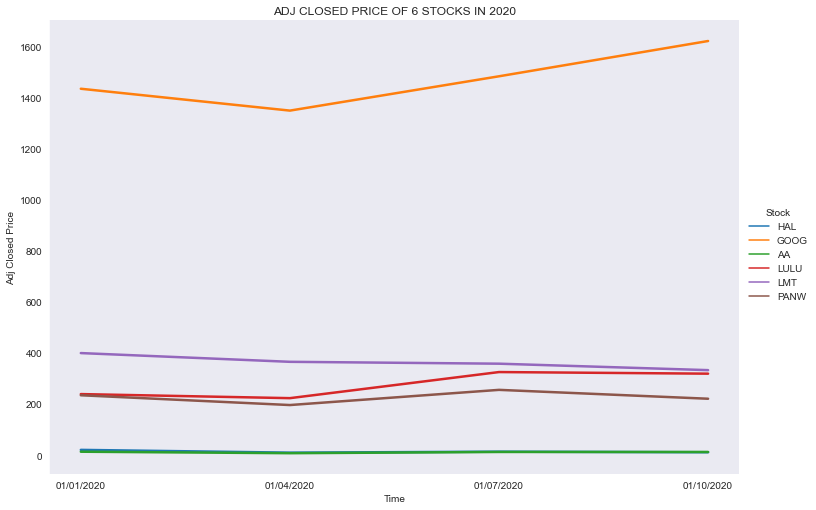

In [14]:
# Lineplot (Sử dụng Relplot để tối ưu hóa tính năng của Lineplot)

sns.relplot(data = st111_df, x = 'Time', y = 'Adj Closed Price', hue = 'Stock', 
            kind = 'line', height = 7, aspect = 1.5, lw = 2.5).set(title = 'ADJ CLOSED PRICE OF 6 STOCKS IN 2020')

### Trực quan hóa "Đường biên hiệu quả của danh mục đầu tư gồm 2 mã cổ phiếu: GOOG và LMT trong giai đoạn 2017 - 2021"

In [29]:
stock_df = pd.read_csv ('Data_Question5.csv', index_col =['Time'], parse_dates=True)
stock_df

#index_col = ['Chỉ tiêu']: có thể được sử dụng để buộc Pandas sử dụng cột đầu tiên làm chỉ mục
#parse_dates: định dạng cột là ngày

,Adj Closed Price (GOOG),Adj Closed Price (LMT)
Time,,
2017-01-01,796.789978,217.490036
2017-01-04,905.960022,234.776657
2017-01-07,930.500000,256.181854
2017-01-10,1016.640015,271.844910
2018-01-01,1169.939941,314.996796
2018-01-04,1017.330017,286.405762
2018-01-07,1217.260010,292.926086
2018-01-10,1076.770020,265.607361
2019-01-01,1116.369995,263.765961


In [48]:
# Phần trăm (%) lợi nhuận thay đổi của 2 mã cổ phiếu: AA và GOOG
r = stock_df.apply(pd.to_numeric, errors='coerce').pct_change()
r

# pd.to_numeric: chuyển chuỗi ký tự thành chuỗi số 
# errors='coerce': hiển thị giá trị không hợp lệ dưới dạng 'NaN'

,Adj Closed Price (GOOG),Adj Closed Price (LMT)
Time,,
2017-01-01,NaN,NaN
2017-01-04,0.137012,0.079482
2017-01-07,0.027087,0.091173
2017-01-10,0.092574,0.061140
2018-01-01,0.150791,0.158737
2018-01-04,-0.130443,-0.090766
2018-01-07,0.196524,0.022766
2018-01-10,-0.115415,-0.093261
2019-01-01,0.036777,-0.006933


In [31]:
# Lợi nhuận kỳ vọng

e_r = stock_df.resample('Q').last().pct_change().mean()
e_r

Adj Closed Price (GOOG)    0.084074
Adj Closed Price (LMT)     0.013923
dtype: float64

In [32]:
# Phương sai

var_r = r.var()
var_r

Adj Closed Price (GOOG)    0.010931
Adj Closed Price (LMT)     0.009460
dtype: float64

In [33]:
# Độ lệch chuẩn

r_vol = np.sqrt(var_r)
r_vol

Adj Closed Price (GOOG)    0.104551
Adj Closed Price (LMT)     0.097264
dtype: float64

In [34]:
# Ma trận hiệp phương sai

cov_matrix = stock_df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,Adj Closed Price (GOOG),Adj Closed Price (LMT)
Adj Closed Price (GOOG),0.009803,0.005177
Adj Closed Price (LMT),0.005177,0.008934


In [35]:
p_ret = [] # Xác định một mảng lợi nhuận trống để trả về danh mục đầu tư
p_vol = [] # Xác định một mảng độ lệch chuẩn trống cho sự biến động của danh mục đầu tư
p_weights = [] # Xác định một mảng trống cho trọng số của danh mục đầu tư

num_assets = len(stock_df.columns)
num_portfolios = 500 # Giới hạn số phần tử của danh mục đầu tư là 1000
for portfolio in range(num_portfolios): 
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, e_r) # Lợi nhuận là tích số của lợi nhuận kỳ vọng của từng tài sản và trọng số của nó 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Phương sai danh mục đầu tư
    sd = np.sqrt(var) # Độ lệch chuẩn hàng quý
    p_vol.append(sd)

In [36]:
# Tạo khung dữ liệu (dataset) cho danh mục đầu tư

data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(stock_df.columns.tolist()):
    print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios

0 Adj Closed Price (GOOG)
1 Adj Closed Price (LMT)


,Returns,Volatility,Adj Closed Price (GOOG) weight,Adj Closed Price (LMT) weight
0,0.069399,0.090744,0.790807,0.209193
1,0.053227,0.085766,0.560279,0.439721
2,0.046660,0.085167,0.466666,0.533334
3,0.059660,0.087170,0.651988,0.348012
4,0.049159,0.085294,0.502297,0.497703
...,...,...,...,...
495,0.049601,0.085329,0.508586,0.491414
496,0.080041,0.096431,0.942522,0.057478
497,0.048118,0.085226,0.487453,0.512547
498,0.024095,0.089561,0.145001,0.854999


In [39]:
# Danh mục rủi ro thấp nhất 

min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol_port

# idxmin () cho biết giá trị nhỏ nhất trong cột được chỉ định.   

Returns                           0.045373
Volatility                        0.085150
Adj Closed Price (GOOG) weight    0.448316
Adj Closed Price (LMT) weight     0.551684
Name: 493, dtype: float64

In [41]:
# Danh mục rủi ro cao nhất 

rf = 0.01
max_vol_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
max_vol_port

# idxmax () cho biết giá trị lớn nhất trong cột được chỉ định.    

Returns                           0.083048
Volatility                        0.098334
Adj Closed Price (GOOG) weight    0.985383
Adj Closed Price (LMT) weight     0.014617
Name: 423, dtype: float64

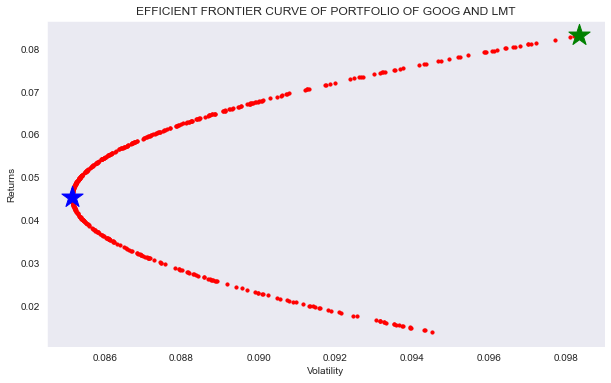

In [49]:
# Vẽ đường biên hiệu quả

portfolios.plot.scatter(x='Volatility', y='Returns', color = 'r', s=10,alpha = 1,
                        figsize=[10,6]).set(title = 'EFFICIENT FRONTIER CURVE OF PORTFOLIO OF GOOG AND LMT')

# Tìm điểm tối ưu 
plt.scatter(min_vol_port[1], min_vol_port[0], color='b', marker='*', s=500 ) # Điểm tối ưu ứng với rủi ro thấp nhất
plt.scatter(max_vol_port[1], max_vol_port[0], color='g', marker='*', s=500) # Điểm tối ưu ứng với rủi ro cao nhất